# **Data Preprocessing  - Play Store Apps Data Analysis**



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# mount the drive and read required data
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df_psdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/2_Numpy Module/chap_21_Capstone Project/Play Store Data.csv')
df_review=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/2_Numpy Module/chap_21_Capstone Project/User Reviews.csv')


### Dataset First View

In [ ]:
# Dataset First Look
# Display the Play Store App data
print('Play Store Data Overview:')
df_psdata.head()


Play Store Data Overview:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Display the User Reviews data
print('User Reviews Data Overview:')
df_review.head()


User Reviews Data Overview:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('Play Store Data Rows count:',df_psdata.shape[0])
print('Play Store Data Columns count:',df_psdata.shape[1])
print('User Reviews Data Rows count:',df_review.shape[0])
print('User Reviews Data Columns count:',df_review.shape[1])


Play Store Data Rows count: 10841
Play Store Data Columns count: 13
User Reviews Data Rows count: 64295
User Reviews Data Columns count: 5


### Dataset Information

In [ ]:
# Dataset Info
print('Play Store Data Info:')
df_psdata.info()
print('\n')
print('User Reviews Data Info:')
df_review.info()


Play Store Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


User Reviews Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Co

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print('Play Store Data Duplicate Value Count:',len(df_psdata[df_psdata.duplicated()]))
print('User Reviews Data Duplicate Value Count:',len(df_review[df_review.duplicated()]))


Play Store Data Duplicate Value Count: 483
User Reviews Data Duplicate Value Count: 33616


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Function to calculate the percentage of null values in each column
def null_percent(data_fm):
    null_info = pd.DataFrame(index=data_fm.columns)
    null_info["datatype"] = data_fm.dtypes
    null_info["not null values"] = data_fm.count()
    null_info["null value"] = data_fm.isnull().sum()
    null_info["null value(%)"] = round(data_fm.isnull().mean() * 100, 2)
    return null_info

# Display the percentage of null values for Play Store Data
print('Null value % in Play Store Data:', null_percent(df_psdata), sep='\n')
print('\n')
# Display the percentage of null values for User Reviews Data
print('Null value % in User Reviews Data:', null_percent(df_review), sep='\n')


Null value % in Play Store Data:
               datatype  not null values  null value  null value(%)
App              object            10841           0           0.00
Category         object            10841           0           0.00
Rating          float64             9367        1474          13.60
Reviews          object            10841           0           0.00
Size             object            10841           0           0.00
Installs         object            10841           0           0.00
Type             object            10840           1           0.01
Price            object            10841           0           0.00
Content Rating   object            10840           1           0.01
Genres           object            10841           0           0.00
Last Updated     object            10841           0           0.00
Current Ver      object            10833           8           0.07
Android Ver      object            10838           3           0.03


Null value % 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Description
print('Play Store Dataset Description:',df_psdata.describe(include='all'),sep='\n',end='\n\n')
print('User Reviews Dataset Description:',df_review.describe(include='all'),sep='\n')


Play Store Dataset Description:
           App Category       Rating Reviews                Size    Installs  \
count    10841    10841  9367.000000   10841               10841       10841   
unique    9660       34          NaN    6002                 462          22   
top     ROBLOX   FAMILY          NaN       0  Varies with device  1,000,000+   
freq         9     1972          NaN     596                1695        1579   
mean       NaN      NaN     4.193338     NaN                 NaN         NaN   
std        NaN      NaN     0.537431     NaN                 NaN         NaN   
min        NaN      NaN     1.000000     NaN                 NaN         NaN   
25%        NaN      NaN     4.000000     NaN                 NaN         NaN   
50%        NaN      NaN     4.300000     NaN                 NaN         NaN   
75%        NaN      NaN     4.500000     NaN                 NaN         NaN   
max        NaN      NaN    19.000000     NaN                 NaN         NaN   

       

### Variables Description

###Descriptions for Play Store Dataset:

**App:** The application's name and a brief description.

**Category:** The app's assigned category.

**Rating:** The average user rating.

**Reviews:** The total number of user reviews.

**Size:** The space the app occupies on a mobile phone.

**Installs:** The overall installations or downloads.

**Type:** Indicates whether the app is free or paid.

**Price:** The installation cost. For free apps, the price is zero.

**Content Rating:** Specifies if the app is suitable for all age groups.

**Genres:** Various categories to which an app can belong.

**Last Updated:** The date of the app's last update.

**Current Ver:** The app's current version.

**Android Ver:** The Android version supporting the app.

###Descriptions for User Reviews Dataset:

**App:** The app's name with a brief description.

**Translated_Review:** English translation of the user's review.

**Sentiment:** The reviewer’s attitude categorized as 'Positive', 'Negative', or 'Neutral'.

**Sentiment_Polarity:** The review's polarity, ranging from -1 (Negative) to 1 (Positive).

**Sentiment_Subjectivity:** The score indicates the degree to which a reviewer’s opinion aligns with the general public’s opinion, with a range of [0, 1]. Higher scores suggest opinions closer to the general public, while lower scores indicate more factual information in the review

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Printing unique values for each variable in the Play Store Dataset
print('Unique Values for each variable in Play Store Dataset:', end='\n\n')

for i in df_psdata.columns.tolist():
    print("No. of unique values in ", i, "is ->", df_psdata[i].nunique())

print('\n')

# Printing unique values for each variable in the User Reviews Dataset
print('Unique Values for each variable in User Reviews Dataset:', end='\n\n')

for i in df_review.columns.tolist():
    print("No. of unique values in ", i, "is ->", df_review[i].nunique())


Unique Values for each variable in Play Store Dataset:

No. of unique values in  App is -> 9660
No. of unique values in  Category is -> 34
No. of unique values in  Rating is -> 40
No. of unique values in  Reviews is -> 6002
No. of unique values in  Size is -> 462
No. of unique values in  Installs is -> 22
No. of unique values in  Type is -> 3
No. of unique values in  Price is -> 93
No. of unique values in  Content Rating is -> 6
No. of unique values in  Genres is -> 120
No. of unique values in  Last Updated is -> 1378
No. of unique values in  Current Ver is -> 2832
No. of unique values in  Android Ver is -> 33


Unique Values for each variable in User Reviews Dataset:

No. of unique values in  App is -> 1074
No. of unique values in  Translated_Review is -> 27994
No. of unique values in  Sentiment is -> 3
No. of unique values in  Sentiment_Polarity is -> 5410
No. of unique values in  Sentiment_Subjectivity is -> 4474


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Print the rows with non-numeric characters in the 'Reviews' column
non_numeric_reviews = df_psdata[df_psdata['Reviews'].str.contains(r'\D')]
print("Rows with non-numeric characters in 'Reviews' column:")
non_numeric_reviews


Rows with non-numeric characters in 'Reviews' column:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# The row at index 10472 contains data that is entirely incorrect or irrelevant.
# The row is deemed unusable or misleading for the analysis, and removing it ensures the integrity and accuracy of the overall dataset.
df_psdata = df_psdata.drop(index=10472)

# Resetting the index ensures that the DataFrame has continuous and ordered indices after dropping a row.
df_psdata = df_psdata.reset_index(drop=True)


In [ ]:
# Convert the 'Reviews' column to integer datatype
df_psdata['Reviews'] = df_psdata['Reviews'].astype(int)


In [ ]:
# Convert the 'Last Updated' column to dates
df_psdata['Last Updated'] = pd.to_datetime(df_psdata['Last Updated']).dt.date


In [ ]:
# Creating a function drop_dollar, which drops the $ symbol if present and returns the value as a float.
def drop_dollar(value):

    if '$' in value:
        return float(value[1:])
    else:
        return float(value)

# Applying the drop_dollar function to the 'Price' column
df_psdata['Price'] = df_psdata['Price'].apply(lambda x: drop_dollar(x))


In [ ]:
# Defining a function drop_plus that removes the '+' symbol if present and returns the result as an integer.

def drop_plus(value):
    '''
    This function drops the + symbol if present and returns the value with int datatype.
    If the value is not a valid integer, return 0.
    '''
    try:
        if '+' and ',' in value:
            return int(value[:-1].replace(',', ''))
        elif '+' in value:
            return int(value[:-1])
        else:
            return int(value)
    except ValueError:
        return 0
    '''
    The 'Installs' column now contains integer values representing the minimum number of times an app has been installed.
    An 'Installs' value of 0 means the app has not been installed.
    An 'Installs' value of 1 means the app has been installed at least once.
    An 'Installs' value of 1000000 means the app has been installed by at least one million users, and so on.
    '''
# The drop_plus function applied to the 'Installs' column
df_psdata['Installs'] = df_psdata['Installs'].apply(lambda x: drop_plus(x))


In [ ]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.

def kb_to_mb(entry):
    '''
    Converts size entries to MB. Returns as a float if in megabytes (M), or converts and rounds to 4 decimal places if in kilobytes (k).
    Returns the original entry if not in either format or if any conversion exception occurs.
    '''
    try:
        if 'M' in entry:
            return float(entry[:-1])
        elif 'k' in entry:
            return round(float(entry[:-1]) / 1024, 4)
        else:
            return entry
    except:
        return entry

# The kb_to_mb funtion applied to the size column
df_psdata['Size'] = df_psdata['Size'].apply(lambda x: kb_to_mb(x))

# Renaming the 'Size' column to 'Size (MB)'.
df_psdata.rename(columns={'Size': 'Size (MB)'}, inplace=True)


In [ ]:
# Verifying the data type information after type conversion
print('Play Store Updated Data Info:')
df_psdata.info()


Play Store Updated Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size (MB)       10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


In [ ]:
# Extract non-float values in 'Size' column
non_float_size_values = df_psdata['Size (MB)'][~df_psdata['Size (MB)'].apply(lambda x: isinstance(x, float))]

# Calculate the percentage of non-float values in 'Size' column
percentage_non_float = (len(non_float_size_values) / len(df_psdata['Size (MB)'])) * 100

# Print the result
print(f"Non-float values in the 'Size (MB)' column: {non_float_size_values.unique()}")
print(f"Percentage of non-float values in the 'Size (MB)' column: {percentage_non_float:.2f}%")


#Varies with device- being the only non-float entry, constituting 15.64%,
#led to the decision to retain rows with this value in the 'Size' column.


Non-float values in the 'Size (MB)' column: ['Varies with device']
Percentage of non-float values in the 'Size (MB)' column: 15.64%


In [ ]:
# Show Dataset Rows & Columns count Before Removing Duplicates
print('Shape Before Removing Duplicates:')
print('Play Store Data Rows count:',df_psdata.shape[0])
print('Play Store Data Columns count:',df_psdata.shape[1])
print('User Reviews Data Rows count:',df_review.shape[0])
print('User Reviews Data Columns count:',df_review.shape[1],end='\n\n')

# Remove duplicates
df_review.drop_duplicates(inplace=True)
df_psdata.drop_duplicates(inplace=True)

# Show Dataset Rows & Columns count After Removing Duplicates
print('Shape After Removing Duplicates:')
print('Play Store Data Rows count:',df_psdata.shape[0])
print('Play Store Data Columns count:',df_psdata.shape[1])
print('User Reviews Data Rows count:',df_review.shape[0])
print('User Reviews Data Columns count:',df_review.shape[1])


Shape Before Removing Duplicates:
Play Store Data Rows count: 10840
Play Store Data Columns count: 13
User Reviews Data Rows count: 64295
User Reviews Data Columns count: 5

Shape After Removing Duplicates:
Play Store Data Rows count: 10357
Play Store Data Columns count: 13
User Reviews Data Rows count: 30679
User Reviews Data Columns count: 5


In [ ]:
# Fill missing values for numerical columns with the median and categorical with the mode
# For Play Store
df_psdata['Rating'].fillna(df_psdata['Rating'].median(), inplace=True)
df_psdata['Type'].fillna(df_psdata['Type'].mode()[0], inplace=True)
df_psdata['Content Rating'].fillna(df_psdata['Content Rating'].mode()[0], inplace=True)
df_psdata['Current Ver'].fillna('Varies with device', inplace=True)
df_psdata['Android Ver'].fillna('Varies with device', inplace=True)

# For User Reviews
df_review['Sentiment_Polarity'].fillna(df_review['Sentiment_Polarity'].median(), inplace=True)
df_review['Sentiment_Subjectivity'].fillna(df_review['Sentiment_Subjectivity'].median(), inplace=True)
df_review['Sentiment'].fillna(df_review['Sentiment'].mode()[0], inplace=True)
df_review['Translated_Review'].fillna('No review', inplace=True)

# Check missing values again to confirm
user_reviews_missing_updated = df_review.isnull().sum()
play_store_missing_updated = df_psdata.isnull().sum()

print('\nUpdated number of missing values in Play Store dataset:')
print(play_store_missing_updated)
print('Updated number of missing values in User Reviews dataset:')
print(user_reviews_missing_updated)



Updated number of missing values in Play Store dataset:
App               0
Category          0
Rating            0
Reviews           0
Size (MB)         0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64
Updated number of missing values in User Reviews dataset:
App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


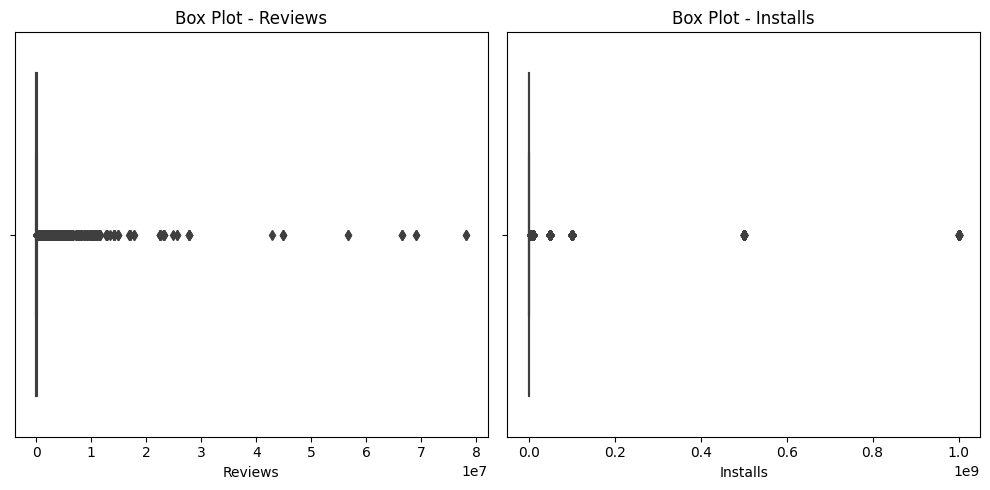

In [ ]:
# Visualizing Outliers through Box Plots
# Set up the figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Box plot for Reviews
sns.boxplot(ax=axes[0], x=df_psdata['Reviews'])
axes[0].set_title('Box Plot - Reviews')

# Box plot for Installs
sns.boxplot(ax=axes[1], x=df_psdata['Installs'])
axes[1].set_title('Box Plot - Installs')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# Show Dataset Rows & Columns count Before Removing Outliers
print('Shape Before Removing Outliers:')
print('Play Store Data Rows count:',df_psdata.shape[0])
print('Play Store Data Columns count:',df_psdata.shape[1])
print('User Reviews Data Rows count:',df_review.shape[0])
print('User Reviews Data Columns count:',df_review.shape[1],end='\n\n')

# Removing Outliers from Data
# Define the quantile range
quantile_low = 0.05
quantile_high = 0.95

# Remove outliers for Reviews column
df_psdata = df_psdata[(df_psdata['Reviews'] >= df_psdata['Reviews'].quantile(quantile_low)) &
                      (df_psdata['Reviews'] <= df_psdata['Reviews'].quantile(quantile_high))]

# Remove outliers for Installs column
df_psdata = df_psdata[(df_psdata['Installs'] >= df_psdata['Installs'].quantile(quantile_low)) &
                      (df_psdata['Installs'] <= df_psdata['Installs'].quantile(quantile_high))]

# Show Dataset Rows & Columns count After Removing Outliers
print('Shape After Removing Outliers:')
print('Play Store Data Rows count:',df_psdata.shape[0])
print('Play Store Data Columns count:',df_psdata.shape[1])
print('User Reviews Data Rows count:',df_review.shape[0])
print('User Reviews Data Columns count:',df_review.shape[1])


Shape Before Removing Outliers:
Play Store Data Rows count: 10357
Play Store Data Columns count: 13
User Reviews Data Rows count: 30679
User Reviews Data Columns count: 5

Shape After Removing Outliers:
Play Store Data Rows count: 9404
Play Store Data Columns count: 13
User Reviews Data Rows count: 30679
User Reviews Data Columns count: 5


In [ ]:
# Dropping unnecessary columns for analysis from Play Store and User Reviews Dataset
# Drop the 'Current Ver' column from df_psdata
df_psdata = df_psdata.drop('Current Ver', axis=1)

# Drop the 'Translated_Review' column from df_review
df_review = df_review.drop('Translated_Review', axis=1)

print('Shape After Removing Unnecessary Columns:')
# Dataset Rows & Columns count
print('Play Store Data Rows count:',df_psdata.shape[0])
print('Play Store Data Columns count:',df_psdata.shape[1])
print('User Reviews Data Rows count:',df_review.shape[0])
print('User Reviews Data Columns count:',df_review.shape[1])


Shape After Removing Unnecessary Columns:
Play Store Data Rows count: 9404
Play Store Data Columns count: 12
User Reviews Data Rows count: 30679
User Reviews Data Columns count: 4


### What all manipulations have you done and insights you found?

The following actions were taken to make the datasets analysis-ready:

1. **Identifying Non-Numeric Reviews:**
   - Checked and printed rows with non-numeric characters in the 'Reviews' column.

2. **Removing Irrelevant Row:**
   - Dropped the row at index 10472 as it contained incorrect or irrelevant data, ensuring dataset integrity.

3. **Converting Reviews to Integer:**
   - Converted the 'Reviews' column to integer data type for numerical analysis.

4. **Converting Last Updated to Datetime:**
   - Converted the 'Last Updated' column to datetime format for temporal analysis.

5. **Handling Price Values:**
   - Created a function (`drop_dollar`) to drop the '$' symbol and convert the 'Price' column to float data type.

6. **Handling Installs Values:**
   - Created a function (`drop_plus`) to drop the '+' symbol and convert the 'Installs' column to integer data type.

7. **Converting Size Entries:**
   - Created a function (`kb_to_mb`) to convert size entries to MB and handle 'k' or 'M' units.

8. **Verifying Data Types:**
   - Checked and printed the updated data type information after the type conversion.

9. **Removing Duplicates:**
   - Removed duplicate rows from both the Play Store and User Reviews datasets.

10. **Handling Missing Values:**
    - Filled missing values for numerical columns with the median and categorical columns with the mode.
    - Checked and printed the updated number of missing values in both datasets.

11. **Handling Outliers:**
    - Visualized outliers through box plots for Reviews and Installs.
    - Removed outliers from data based on quantile range (5% to 95%) for Reviews and Installs.

12. **Removing Unnecessary Columns:**
   - Certain columns were considered non-significant to the analysis and were subsequently dropped. Specifically, the 'Current Ver' column in the Play Store Dataset (`df_psdata`) and the 'Translated_Review' column in the User Reviews Dataset (`df_review`) were excluded.

###Exporting Cleaned Data to Excel Files

In [ ]:
# Saving the DataFrame as an Excel file
df_psdata.to_excel('cleaned_psdata.xlsx', index=False)
df_review.to_excel('cleaned_review.xlsx', index=False)


##**Analysis by: Rohit Paul**

##**Email: rohitpaul09@gmail.com**